# Confusion Matrices

## Introduction

In this lesson, we'll learn to construct, visualize, and interpret a **_Confusion Matrix_** to evaluate the performance of a classifier!

## Objectives

You will be able to:

* Create and interpret a Confusion Matrix using numpy
* Create and interpret a Confusion Matrix using sklearn

## How to Evaluate Classifier Performance?

So far, we've spent most of our time learning the ins and outs of Regression Analysis.  Regression allows us to answer "how much/how many" questions. We've learned how to interpret important regression model statistics such as $R^2$ and select appropriate predictors by evaluating their p-values. However, the statistics that help us evaluate the quality of our regression models aren't something we can use to evaluate the performance of a classifier. For that, we need a **_Confusion Matrix_**! 

A Confusion Matrix tells us 4 important things.  For this explanation, let's assume our model was trained for a **_Binary Classification_** task, meaning that every item in the data set has a ground-truth value of 1 or 0. To make it easier to understand, let's pretend our model is trying to predict whether or not someone has a disease. 

**_True Positives (TP)_**: The model predicted the person has the disease (1), and they actually have the disease (1).

**_True Negatives (TN)_**: The model predicted the person is healthy (0), and they are actually healthy (0).

**_False Positives (FP)_**: The model predicted the person has the disease (1), but they are actually healthy (0). 

**_False Negatives (FN)_**: The model predicted the person is healthy (0), but they actually have the disease (1).

Let's take a look at an example Confusion Matrix:

<img src='rf-conf-matrix.png'>

As we can see, one axis of the Confusion Matrix represents the ground-truth value of the items the model made predictions on, while the other axis represents the label predicted by the classifier. We read a confusion matrix by looking at the intersection of each row and column to tell what each cell represents. For instance, in the example above, the bottom right square represents _True Positives_, because it is the intersection of "True Label: 1" row and the "Predicted Label: 1" column. 

Take another look at the diagram above and see if you can figure out which cell which cells represent TP, FP, and FN. 

## Constructing a Confusion Matrix

In order to construct a Confusion Matrix, we need 2 things:

* Predictions for each data point in a training or testing set. 
* Labels for the same data points in that training or testing set. 

Writing a Confusion Matrix from scratch in Python is a pretty intuitive process, since our labels and our predictions have the same order (e.g. `predictions[0]` and `lablels[0]` both refer to the same row in our dataset).

To create a Confusion Matrix from scratch, we:

1. Iterate through both lists and grab the item at the same the label and corresponding prediction.  Note that `enumerate` is great here, since it gives us both an item and the index of that item from a list. 
2. Use some control flow to determine if its a TP, TN, FP, or FN. 
3. Store our results in a dictionary or 2-dimensional array. 
4. Return our results once we've checked every prediction against its corresponding label. 

In [1]:
def confusion_matrix(labels, predictions):
    conf_matrix = {"TP": 0, "FP": 0, "TN": 0, "FN": 0}
    for ind, label in enumerate(labels):
        pred = predictions[ind]
        if label == 1:
            # CASE: True Positive
            if label == pred:
                conf_matrix['TP'] += 1
            # CASE: False Negative 
            else:
                conf_matrix['FN'] += 1
        else:
            # CASE: True Negative
            if label == pred:
                conf_matrix['TN'] += 1
            # CASE: False Positive
            else:
                conf_matrix['FP'] += 1
    
    return conf_matrix

example_preds = [1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1]
example_labels= [1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0]

confusion_matrix(example_labels, example_preds)

{'FN': 2, 'FP': 3, 'TN': 2, 'TP': 4}

Take a look at the `example_preds` and `example_labels` lists in the cell above. Confirm that the counts in the confusion matrix the function output are correct--it's good practice to be able to do this manually!

## Confusion Matrices for Multi-Categorical Classification Problems

So far, we've kept it simple by only focusing on Confusion Matrices for binary classification problems. However, it's common to see classification tasks that **_Multi-categorical_** in nature. We can keep track of these by just expanding the number of rows and columns in our confusion matrix!

<img src='cm2.png'>

This example is from the Reuters Newsgroups dataset. As we can see in the example above, we just use an equivalent number of rows and columns, with each row and column sharing the same index referring to the same class. In this, the true labels are represented by the rows, while the predicted classes are reperesented by the columns. 

Take a look at the diagonal starting in the top-left and moving down and to the right. This diagonal represents our **_True Positives_**, since the indexes are the same for both row and column. For instance, we can see at location \[19, 19\] that 281 political articles about guns were correctly classified as political articles about guns. Since our model is multi-categorical, we may also be interested in exactly **_how_** a model was incorrect with certain predictions. For instance, by looking at \[4, 19\] that 33 articles that were of category _talk.politics.misc_ were incorrectly classified as _talk.politics.guns_.  Note that when viewed through the lens of the _talk.politics.misc_, these are **_False Negatives_**--our model said they weren't about this topic, and they were. However, they are also **_False Positives_** for _talk.politics.guns_, since our model said they were about this, and they weren't!


### Using sklearn To Create Confusion Matrices

Since **_Confusion Matrices_** are a vital part of evaluating supervised learning classification problems, it's only natural that sklearn has provided a quick and easy way to create them. You'll find the `confusion_matrix()` function inside the `sklearn.metrics` module. This function expects two arguments--the labels, and the predictions, in that order. 

In [2]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(example_labels, example_preds)
cf

array([[2, 3],
       [2, 4]])

Take a minute to compare the output of this confusion matrix to the output of the one we created manually and ensure that everything matches up!

One nice thing about using sklearn's implementation of a confusion matrix is that it automatically adjusts to the number of categories present in the labels. For example:

In [3]:
ex2_labels = [0, 1, 2, 2, 3, 1, 0, 2, 1, 2, 3, 3, 1, 0]
ex2_preds =  [0, 1, 1, 2, 3, 3, 2, 2, 1, 2, 3, 0, 2, 0]

cf2 = confusion_matrix(ex2_labels, ex2_preds)
cf2

array([[2, 0, 1, 0],
       [0, 2, 1, 1],
       [0, 1, 3, 0],
       [1, 0, 0, 2]])

Take a minute to examine the output above, and see if you can interpret the Confusion Matrix correctly. For instance, see if you can figure out how many 3's were mistakenly predicted to be a 0. 

## Visualizing Confusion Matrices with Matplotlib

As a final topic on this subject, we'll go over some brief boilerplate code for how we can visualize a confusion matrix using matplotlib. Don't worry if you don't understand this code off the bat--the more you use it and play around with it, the more you'll understand it. 

The following function shows how to take some labels and predictions and create a nice, stylized visual representation of a confusion matrix:

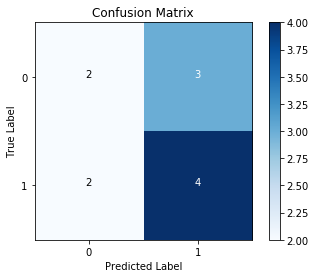

In [4]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
% matplotlib inline

def show_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

show_cf(example_labels, example_preds)

Note that we can also use this function to visualize multi-categorical confusion matrices!

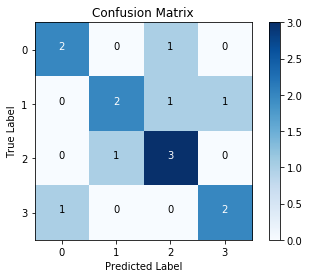

In [5]:
show_cf(ex2_labels, ex2_preds)

## Summary

On their own, Confusion Matrices are a very handy tool to help us understand at a glance how well a classification model is performing. However, we'll see that the truly useful information comes when we use confusion matrices to calculate **_Evaluation Metrics_** such as accuracy, precision, and recall!